### Preliminaries: 

In [94]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [210]:
#GUIDE: 
    #og_df = original df with all data *don't edit* 
    #df = edited df 
    #sex_df = df sorted by sex (with both prompts) 
    # **gen_df = subset of data with only gender x general prompt **
    # ** ang_df = subset of data with only gender x anger prompt **
    
#This may be way too many dataframes, I'm sorry. The main ones we should be using for now should be the last two 

In [105]:
og_df = pd.read_csv("proj_responses.csv")  #load in dataframe 

In [152]:
df = og_df.copy()   #make copy of df to manipulate 

### Wrangling: 

In [153]:
df = df.drop('Timestamp', axis = 1) #remove timestamp column 
df = df.drop(index = [18, 37]) 

#ignore error msgs 

In [178]:
## binarizing gender column: men = 0, women = 1 
sex_df = df.sort_values("Sex").reset_index()  #sort by gender 
sex_df.loc[0:20, 'Sex'] = 1  #rows 0-20 = 1 for woman
sex_df.loc[21:, 'Sex'] = 0 #rows 21 to end = 0 for man

In [180]:
#making df for general prompt and anger prompt: 
gen_df = df[["Sex", "General Prompt"]]
ang_df = df[["Sex", "Anger Prompt"]]

### Data Visualizations: 

<Axes: xlabel='Age', ylabel='Count'>

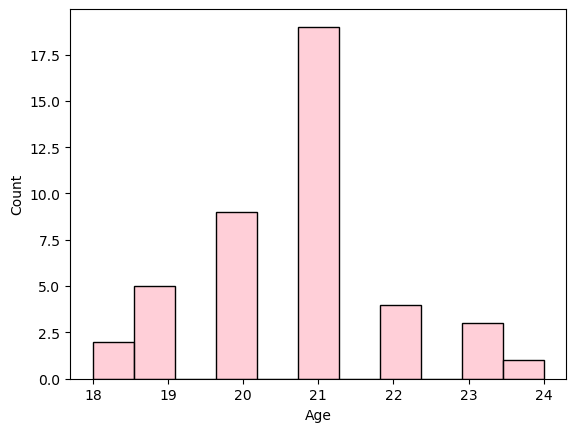

In [133]:
#age hist
sns.histplot(data = df, x = "Age", color = 'pink')

<Axes: xlabel='word count (prompt 1)', ylabel='Count'>

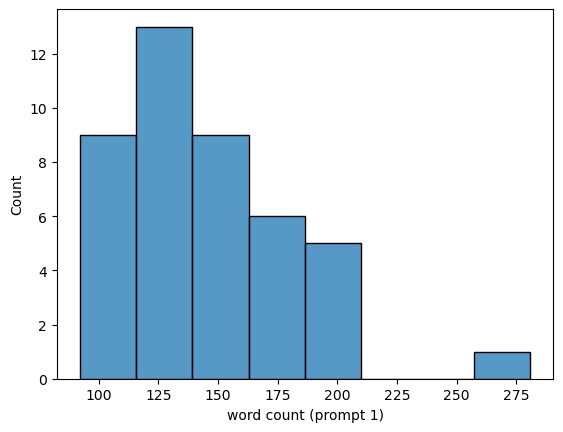

In [140]:
#gen prompt hist
sns.histplot(data= df, x = "word count (prompt 1)")

<Axes: xlabel='word count (prompt 2)', ylabel='Count'>

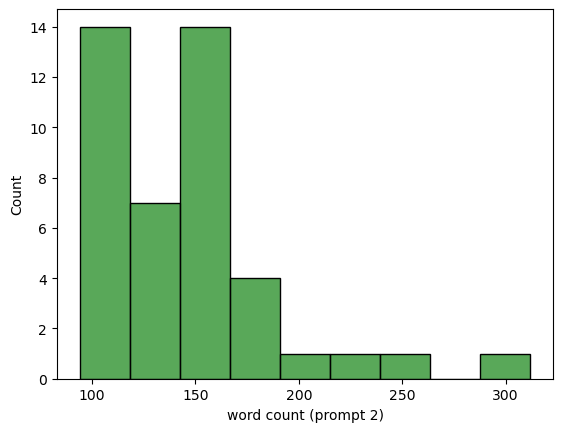

In [139]:
#anger prompt hist
sns.histplot(data= df, x = "word count (prompt 2)", color = 'forestgreen')

### Processing the Text

In [207]:
#import packages
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.casual import TweetTokenizer
ttokenizer = TweetTokenizer() 

In [206]:
#tokenize our general responeses
gen_prompt_list = [] 
for entry in gen_df["General Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    gen_prompt_list.append(tokenized_entry)

In [204]:
#tokenize our angry responeses
ang_prompt_list = [] 
for entry in ang_df["Anger Prompt"]: 
    tokenized_entry = ttokenizer.tokenize(entry)
    ang_prompt_list.append(tokenized_entry)